In [1]:
import requests
from bs4 import BeautifulSoup
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps
import random
from wordcloud import ImageColorGenerator
import numpy as np

C:\Users\QaisAmini\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# L'url du site à scrapper
url='https://www.passeportsante.net/fr/Maux/Symptomes/Index.aspx'
# J'emet ma requet HTTP avec un"GET" au serveur du site identifier dans l'url
r = requests.get(url)
# J'affiche l'url requété ainsi que le retour du serveur
print(url, r.status_code)
# Je demande à beautifulSoup de conserver dans une variable soup la page web à scrapper (url) un script html
soup = BeautifulSoup(r.content)

https://www.passeportsante.net/fr/Maux/Symptomes/Index.aspx 200


In [3]:
liste_maladies=[]
for elem in soup.find_all('a',attrs={'class' : "glossary_title"}):
    liste_maladies.append(elem.text.strip())
liste_maladies

['Acouphènes',
 'Adénomégalie',
 'Aérophagie',
 'Agnosie',
 'Agueusie',
 'Akinésie',
 'Alopécie',
 'Amaigrissement',
 'Aménorrhée',
 'Amyotrophie',
 'Angoisses',
 'Aniscorie',
 'Anosmie',
 'Anosognosie',
 'Apathie',
 'Aphtes',
 'Apraxie',
 'Arythmie cardiaque',
 'Ascite',
 'Ataxie',
 'Ballonnements',
 'Blocage du genou',
 'Bouche sèche',
 'Bouffées de chaleur',
 "Boule ou grosseur à l'aine",
 'Boule ou grosseur au sein',
 'Bouton au menton',
 'Bouton sur le nez',
 'Boutons',
 'Bronchospasme',
 'Brûlures',
 'Cellulite',
 "Changement de couleur de l'urine",
 'Cheveux blancs',
 'Cheville enflée',
 'Claudication',
 'Coliques du nourrisson',
 'Colopathie fonctionnelle',
 'Conjonctivite',
 'Constipation',
 'Constipation chez bébé',
 'Convulsions',
 'Courbatures',
 'Crampe au mollet',
 'Crampes',
 "Crise d'angoisse",
 'Croûtes dans le nez',
 'Cyanose',
 'Déformation des doigts',
 'Délire',
 'Démangeaisons',
 "Démangeaisons de l'anus",
 'Démangeaisons de la vulve',
 'Dent qui bouge',
 'Dépress

In [4]:
liste_href=[]
for elem in soup.find_all('a',attrs={'class' : "glossary_title"}):
    liste_href.append("https://www.passeportsante.net" + str(elem.get('href')))
liste_href

['https://www.passeportsante.net/fr/Maux/Problemes/Fiche.aspx?doc=acouphenes_pm',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=adenomegalie',
 'https://www.passeportsante.net/fr/Maux/Problemes/Fiche.aspx?doc=aerophagie',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=agnosie-symptome',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=agueusie-perte-gout-symptome',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=akinesie-symptome',
 'https://www.passeportsante.net/fr/Maux/Problemes/Fiche.aspx?doc=alopecie_pm',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=amaigrissement-symptome',
 'https://www.passeportsante.net/fr/Maux/Problemes/Fiche.aspx?doc=amenorrhee_pm',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=amyotrophie-symptomes',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=angoisse-symptome',
 'https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.asp

In [5]:
import pandas as pd
df = {'Maladie':liste_maladies, 'Liens': liste_href}
df = pd.DataFrame(df)
df.head()

,Maladie,Liens
0,Acouphènes,https://www.passeportsante.net/fr/Maux/Problem...
1,Adénomégalie,https://www.passeportsante.net/fr/Maux/Symptom...
2,Aérophagie,https://www.passeportsante.net/fr/Maux/Problem...
3,Agnosie,https://www.passeportsante.net/fr/Maux/Symptom...
4,Agueusie,https://www.passeportsante.net/fr/Maux/Symptom...


In [6]:
url='https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=agnosie-symptome'
r=requests.get(url)
print(url, r.status_code)
tmp=[]
final=[]
soup = BeautifulSoup(r.content)
for elem in soup.find_all('div',attrs={'class' : "fiche-content mb30"}):
    for el in elem('p'):
        tmp.append(el.text.strip())
    final.append(' '.join(tmp))

final

https://www.passeportsante.net/fr/Maux/Symptomes/Fiche.aspx?doc=agnosie-symptome 200


[" L’agnosie est un trouble acquis de la reconnaissance. Lié à l’interprétation des informations sensorielles, ce trouble peut concerner différents sens dont la vue (agnosie visuelle), l’ouïe (agnosie auditive) et le toucher (agnosie tactile). L’agnosie est un trouble gnosique, c’est-à-dire un trouble de la reconnaissance. Une personne agnosique ne parvient pas à reconnaître un objet, un son, une odeur ou encore un visage connu. L’agnosie se distingue d’autres troubles gnosiques par l’absence de déficit sensoriel primaire. En d’autres termes, une personne agnosique a des fonctions sensorielles normales. L’origine des troubles agnosiques est lié à la transmission et/ou l’interprétation des informations sensorielles. Au niveau du cerveau, une altération de la mémoire sensorielle peut expliquer l’apparition de certains troubles agnosiques. Les troubles agnosiques concernent généralement un seul sens. Les formes les plus fréquentes sont les agnosies visuelles, auditives et tactiles. On par

In [7]:
Texte=[]
for truc in df.Liens:
    r=requests.get(truc)
    #print(truc, r.status_code)
    tmp=[]
    final=[]
    soup = BeautifulSoup(r.content)
    for elem in soup.find_all('div',attrs={'class' : "fiche-content mb30"}):
        for el in elem('p'):
            tmp.append(el.text.strip())
        final.append(' '.join(tmp))
    final
    Texte.append(' '.join(final))
#Texte

In [11]:
symptomes = {'Maladie':liste_maladies, 'Liens': liste_href, 'Définition': Texte}
symptomes = pd.DataFrame(symptomes)
symptomes.head()

,Maladie,Liens,Définition
0,Acouphènes,https://www.passeportsante.net/fr/Maux/Problem...,Les acouphènes sont des bruits « parasites » q...
1,Adénomégalie,https://www.passeportsante.net/fr/Maux/Symptom...,L'adénomégalie est l'augmentation de volume d...
2,Aérophagie,https://www.passeportsante.net/fr/Maux/Problem...,L’aérophagie désigne un phénomène physiologiq...
3,Agnosie,https://www.passeportsante.net/fr/Maux/Symptom...,L’agnosie est un trouble acquis de la reconna...
4,Agueusie,https://www.passeportsante.net/fr/Maux/Symptom...,L’agueusie est un terme médical qui désigne l...


In [14]:
symptomes.to_csv("symptomes.csv")

In [16]:
symptomes=pd.read_csv("symptomes.csv")

In [17]:
#symptomes.replace(to_replace=r'/', value='', regex=True)

In [18]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = get_stop_words('fr')
texts = []
for i in symptomes.Définition:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    longer_tokens = [i for i in stopped_tokens if len(i) > 2]
    texts.append(longer_tokens)

In [19]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [20]:
tfidf = models.TfidfModel(corpus)

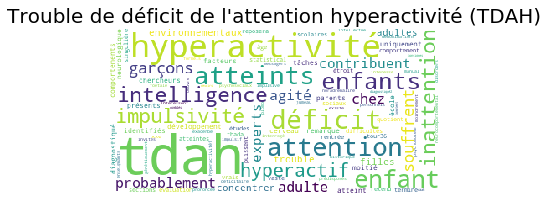

In [28]:
# Sort your tfidf words
tfidf_element = tfidf[corpus[234]]
top_words = np.sort(np.array(tfidf_element, dtype = [('word',int), ('score',float)]),order='score')[::-1]

# Create the dictionary beforehand
top_words_dict = {}
for word,score in top_words:
    top_words_dict[dictionary[word]] = score 


wc = WordCloud(background_color="white",
               random_state=5,
               max_words=100, 
              ).fit_words(top_words_dict)
plt.imshow(wc)
plt.title("{}".format(symptomes.Maladie[234]), fontsize=20)
plt.axis("off")
plt.show()

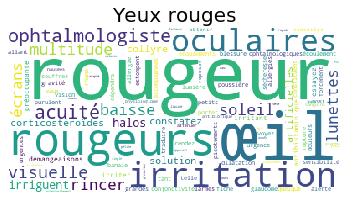

In [29]:
# Sort your tfidf words
for i in range(247):
    tfidf_element = tfidf[corpus[i]]
    top_words = np.sort(np.array(tfidf_element, dtype = [('word',int), ('score',float)]),order='score')[::-1]

    # Create the dictionary beforehand
    top_words_dict = {}
    for word,score in top_words:
        top_words_dict[dictionary[word]] = score 

    # Use your dictionary in the WordCloud creation
    wc = WordCloud(background_color="white",
        random_state=5, max_words=100).fit_words(top_words_dict)
    
    plt.imshow(wc)
    plt.title("{}".format(symptomes.Maladie[i]), fontsize=20)
    plt.axis("off")
   
    plt.savefig(fname= symptomes.Maladie[i]+'.png')